
# step 1_1: reading data

In [1]:
import pandas as pd

In [2]:
input_data0=pd.read_csv('world-happiness-report/2017.csv')
input_data0.shape

(155, 12)

# step 1_2:Cleaning data

In [3]:
input_data = input_data0.drop(['Country'], axis=1)

In [4]:
input_data.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# step 1_3:Saved cleaned data

In [5]:
input_data.to_csv('cleaned_2017.csv')

In [6]:
input_data=pd.read_csv('cleaned_2017.csv')
input_data.head()

,Unnamed: 0,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# step 2: Features selection

In [7]:
input_data = input_data.drop(['Unnamed: 0'], axis =1)
print(input_data.columns,input_data.shape)

Index(['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object') (155, 11)


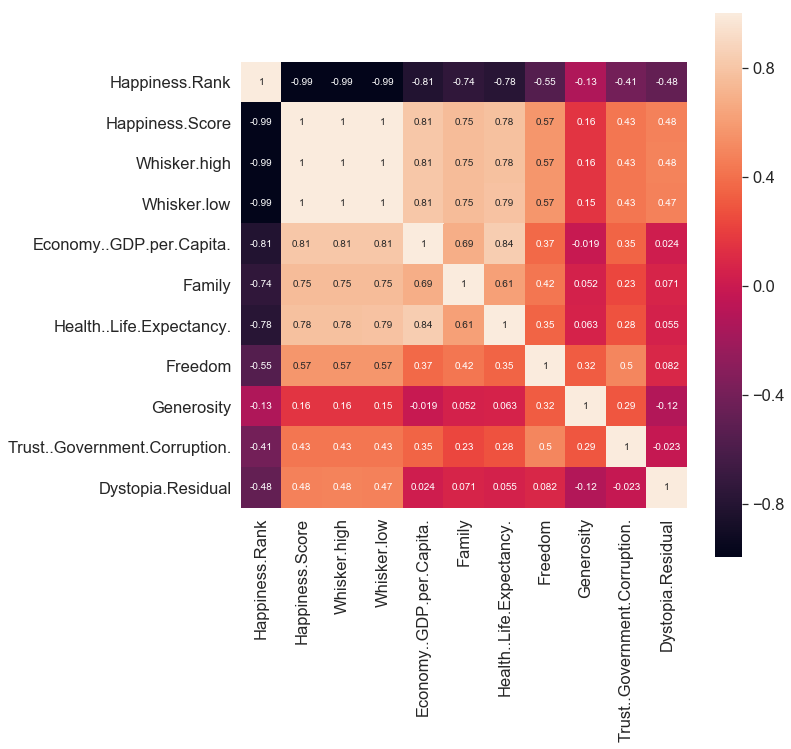

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (10,10)) # (figsize = (18,18) size of the matrix
sns.set(font_scale=1.5)
sns.heatmap(input_data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
#size correlaton eg1,-0.99
plt.show()

In [12]:
selected_input_data = input_data[['Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Happiness.Rank']]

In [13]:
selected_input_data.columns = ['economy','family','health_expect','happy']

In [14]:
selected_input_data.head()

,economy,family,health_expect,happy
0,1.616463,1.533524,0.796667,1
1,1.482383,1.551122,0.792566,2
2,1.480633,1.610574,0.833552,3
3,1.564980,1.516912,0.858131,4
4,1.443572,1.540247,0.809158,5


# Step 3: Split data to train and test

In [15]:
from sklearn.model_selection import train_test_split
selected_input_data_train, selected_input_data_test= train_test_split(selected_input_data, test_size=0.20, random_state=31)

In [16]:
selected_input_data_train.head()

,economy,family,health_expect,happy
112,0.234306,0.870701,0.106654,113
85,1.079374,1.402417,0.574874,86
2,1.480633,1.610574,0.833552,3
45,1.291788,1.445712,0.699475,46
47,1.395067,1.444923,0.853144,48


In [ ]:
selected_input_data_test.head()

# Step 3_1: Split train and test data to features and outcome

In [17]:
selected_input_data_train_features =selected_input_data_train.drop(['happy'], axis=1)
selected_input_data_train_features.head()
selected_input_data_train_output = selected_input_data_train['happy']
selected_input_data_train_output.head()

112    113
85      86
2        3
45      46
47      48
Name: happy, dtype: int64

In [22]:
selected_input_data_test_features =selected_input_data_test.drop(['happy'], axis=1)
selected_input_data_test_features.head()
selected_input_data_test_output = selected_input_data_test['happy']
selected_input_data_test_output.head()

101    102
102    103
132    133
105    106
136    137
Name: happy, dtype: int64

# Step 4: Define a model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
My_model = LinearRegression()

# Step 5: Train the model

In [20]:
My_model.fit(selected_input_data_train_features,selected_input_data_train_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Step 6: Do the prediction on test data

In [23]:
y_pred = My_model.predict(selected_input_data_test_features)

In [ ]:
y_pred

# Step 7: Measure the accuracy

In [24]:
from sklearn.metrics import mean_squared_error
print ('mean_squared_error= ', mean_squared_error(selected_input_data_test_output,y_pred))

mean_squared_error=  399.1102736647608


In [25]:
from sklearn.metrics import r2_score
print ('r2_score= ', r2_score(selected_input_data_test_output,y_pred))

r2_score=  0.7802626381479858


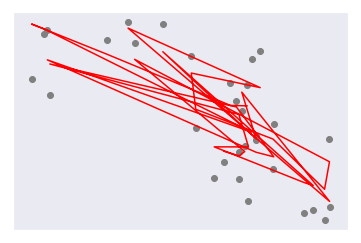

In [26]:
plt.scatter(selected_input_data_test_features['health_expect'],selected_input_data_test_output,color='grey')
plt.plot(selected_input_data_test_features['health_expect'],y_pred, color='red')
plt.xticks(())
plt.yticks(())

plt.show()